## Computer Vision Pytorch libraries
### torchvision
`torchvision.datasets`get datasets and data loading functions for computer vision

`torchvision.models`get pretrained computer vision models that you can leverage for your own problems

`torchvision.transforms`functions for manipulating your vision data (images) to be suitable for use with an ML model

`torchvision.utils`helper functions for viewing images

`torch.utils.data.Dataset`base dataset class for PyTorch

`torch.utils.data.DataLoader`create a Python iterable over a dataset


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



In [2]:
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


### Getting Dataset: FashionMNIST

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:08<00:00, 3.20MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 1.10MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.34MB/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [22]:
image, label = train_data[0]

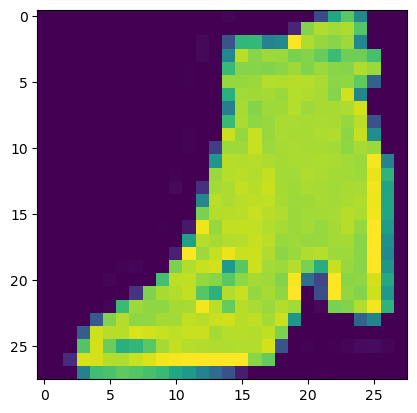

In [15]:
plt.imshow(train_data[33313][0].permute(1, 2, 0))

In [17]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [18]:
class_to_idx = {class_name: idx for idx, class_name in enumerate(train_data.classes)}
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [19]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [28]:
image.shape, label
print(f"Image shape: {image.shape} = [Color channels, Height, Width] and label: {label} = {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) = [Color channels, Height, Width] and label: 9 = Ankle boot


### Visualizing Data

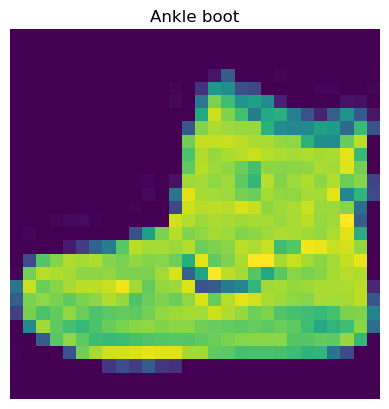

In [29]:
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.permute(1, 2, 0))
plt.title(class_names[label])
plt.axis(False)
plt.show()

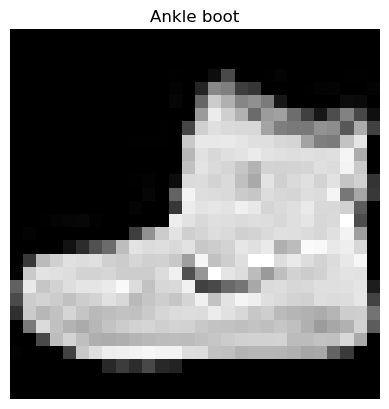

In [30]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

### Plot more images

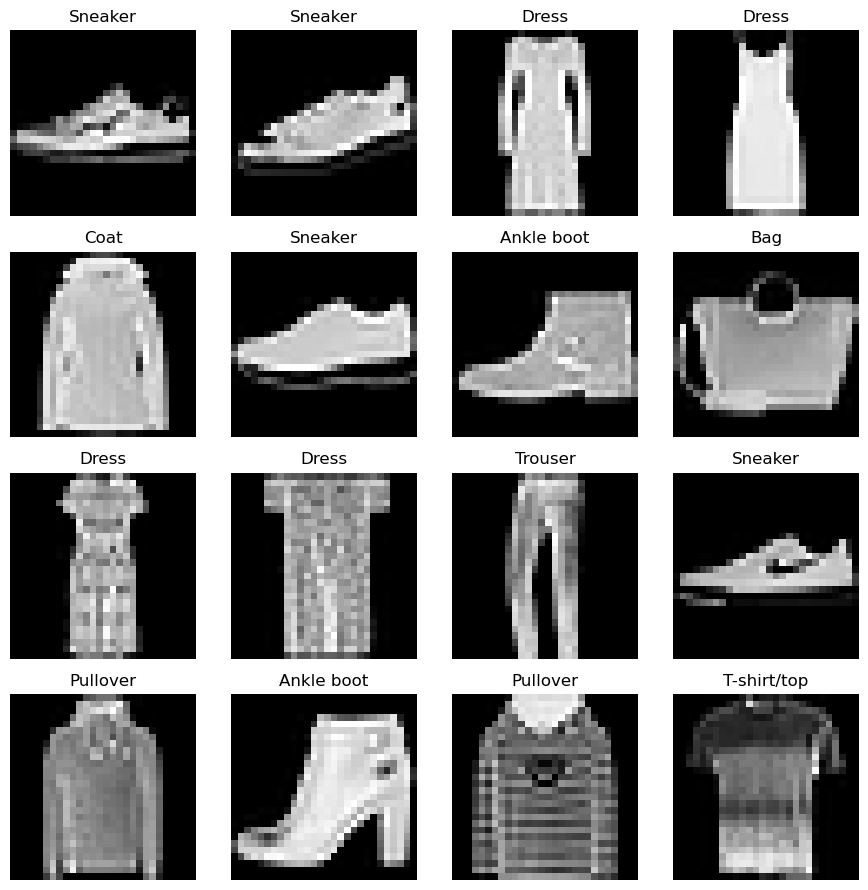

In [35]:
torch.manual_seed(38)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
plt.tight_layout()
plt.show()

### Prepare DataLoader

In [36]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Need to turn data into groups of batches = mini-batches
-> Computationally efficient, not able to look and store in memory 60'000 images. 
-> Idea: break it down into 32 images at a time (batch size = 32)
---> Gives our neural network 

`shuffle=True` -> mix up the data so that the model doesn't learn anything

In [37]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7702045f2720>,
 <torch.utils.data.dataloader.DataLoader at 0x7701f7fb9730>)

In [38]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7702045f2720>, <torch.utils.data.dataloader.DataLoader object at 0x7701f7fb9730>)


In [39]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} images")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} images")

# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

Length of train_dataloader: 1875 batches of 32 images
Length of test_dataloader: 313 batches of 32 images


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

### Show a sample

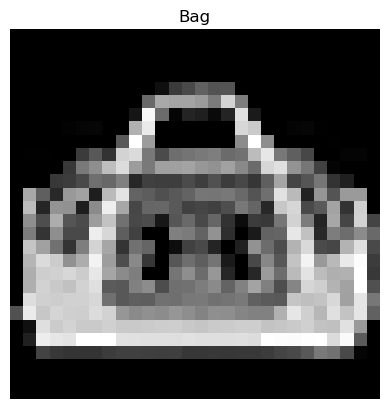

Image size: torch.Size([1, 28, 28]) = [Color channels, Height, Width]
Label: 8 = Bag


In [41]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
plt.show()

print(f"Image size: {img.shape} = [Color channels, Height, Width]")
print(f"Label: {label} = {class_names[label]}")



### Model 0: Build a baseline model = simple model to improve with subsequent models/experiments
* Create a flatten model
* Create a Sequential model
* Create a forward method
* Setup a loss function and optimizer
* Training and testing loop


In [43]:
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Print out original shape
print(f"Shape before flattening: {x.shape}")

# Flatten the sample
output = flatten_model(x)

# Print out new shape
print(f"Shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [48]:
from torch import nn

class FashionMNISTModelV0(nn.Module): 
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)




In [49]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=10, output_shape=len(class_names))
model_0.to("cpu")



FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [52]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.1747,  0.2848,  0.0754, -0.1747,  0.4594,  0.1398,  0.4141,  0.2572,
         -0.2044, -0.0451]], grad_fn=<AddmmBackward0>)